In [38]:
from scipy.stats import truncnorm, norm

In [39]:
from toolbox.utils import *
from toolbox.utils.math import gaussian_func, gaussian_int
from toolbox import plot

In [40]:
plot.use_style("pub")

In [41]:
sigma = np.array([0.669, 0.669]).reshape(-1, 1)
coords = np.array([5.0, 10.0]).reshape(-1, 1)
charges = np.array([1.0, -1.0])
bin_edges = np.linspace(0, 15, 16).reshape(1, -1)

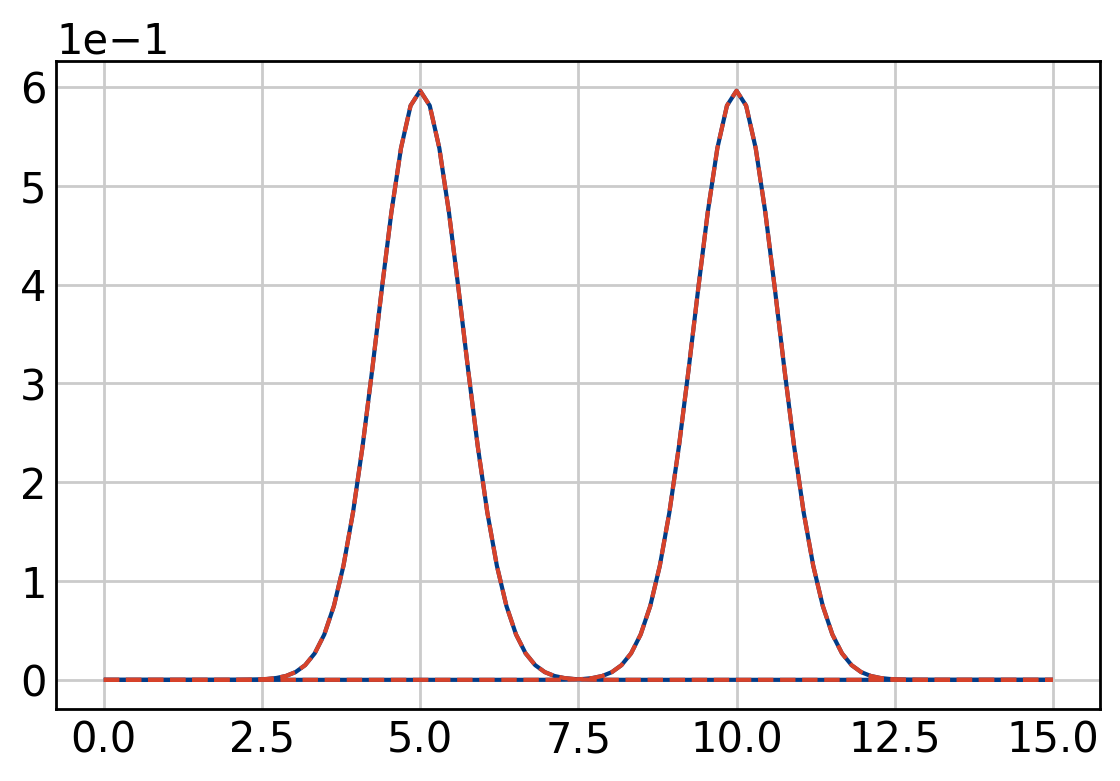

In [43]:
_x = np.linspace(0, 15, 100)
x = np.tile(_x.reshape(1, -1), (2, 1))
plt.plot(np.transpose(x), np.transpose(gaussian_func(x, coords, sigma)), color="blue")

plt.plot(_x, norm(coords[0], sigma[0]).pdf(_x), "--", color="red")
plt.plot(_x, norm(coords[1], sigma[1]).pdf(_x), "--", color="red")

plt.show()

In [19]:
(bin_edges - coords) / (np.sqrt(2) * sigma)

array([[ -5.28480404,  -4.22784324,  -3.17088243,  -2.11392162,
         -1.05696081,   0.        ,   1.05696081,   2.11392162,
          3.17088243,   4.22784324,   5.28480404,   6.34176485,
          7.39872566,   8.45568647,   9.51264728,  10.56960809],
       [-10.56960809,  -9.51264728,  -8.45568647,  -7.39872566,
         -6.34176485,  -5.28480404,  -4.22784324,  -3.17088243,
         -2.11392162,  -1.05696081,   0.        ,   1.05696081,
          2.11392162,   3.17088243,   4.22784324,   5.28480404]])

In [44]:
# nat * (nbins + 1)
rho = charges.reshape(-1, 1) * gaussian_int(bin_edges, coords, sigma.reshape(-1, 1))
# nat * nbins
rho = np.diff(rho, axis=1)
rho = np.sum(rho, axis=0)

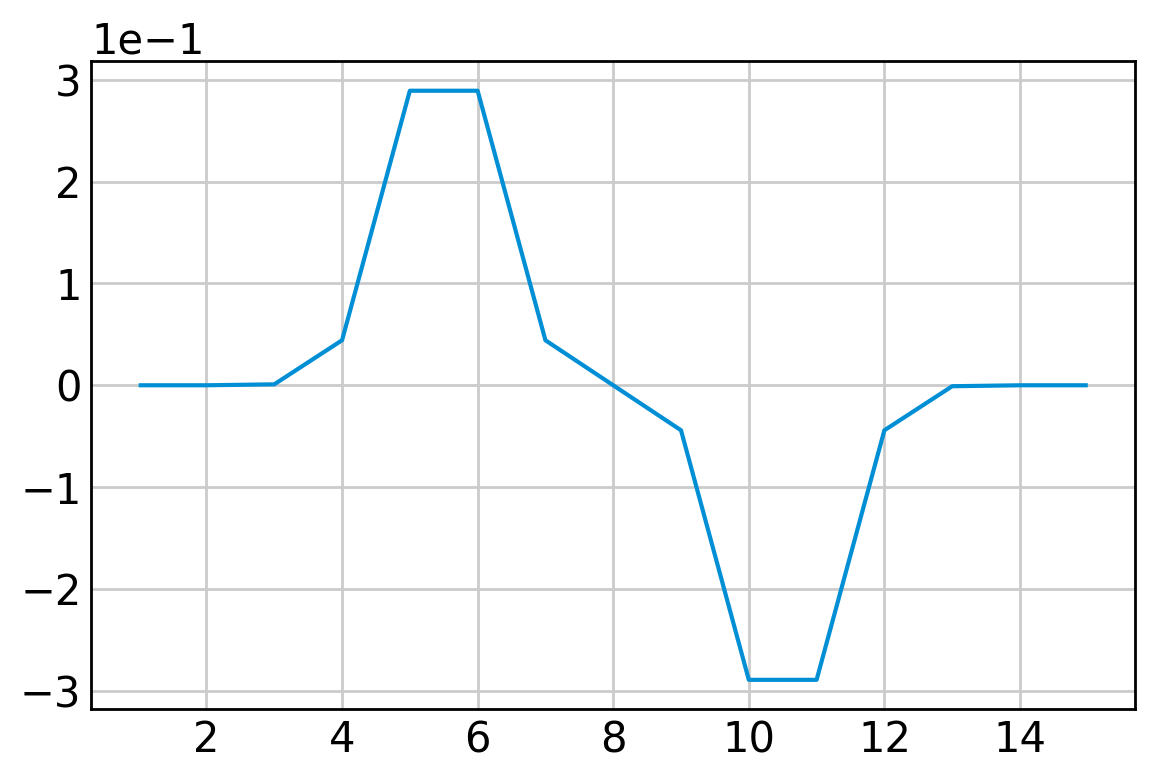

In [46]:
plt.plot(bin_edges[0, 1:], rho)

plt.show()

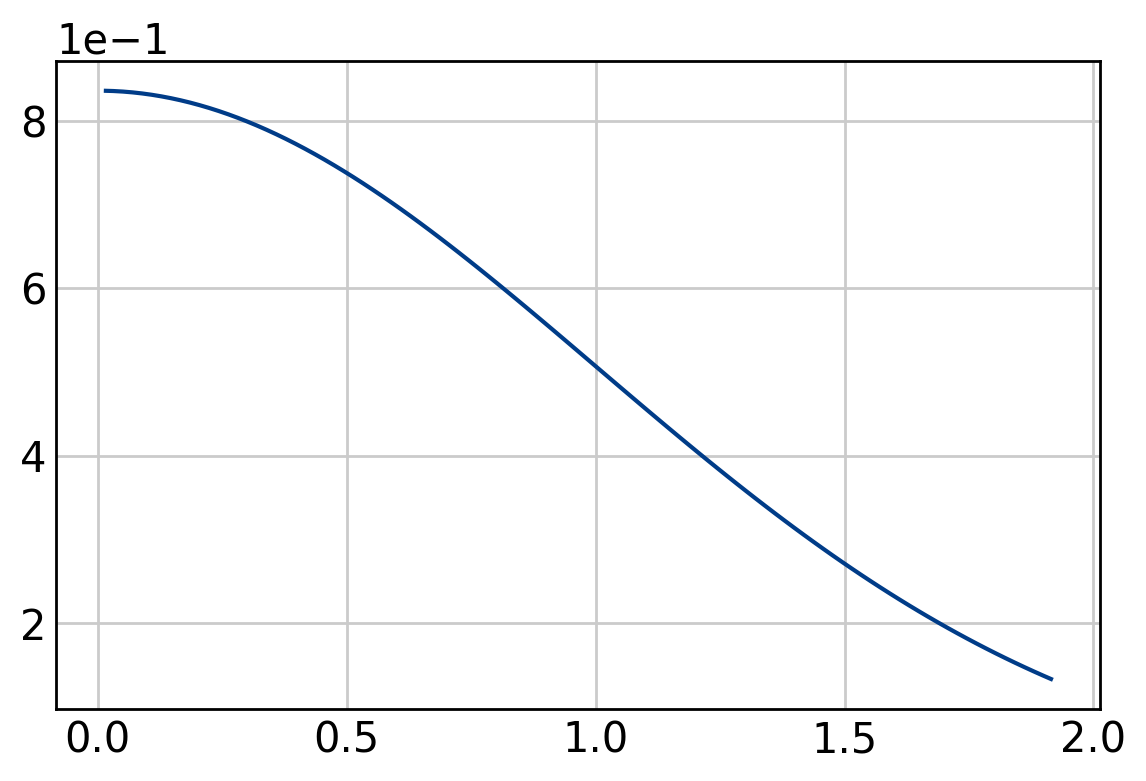

In [25]:
a, b = 0, 2

x = np.linspace(truncnorm(0, 1).ppf(0.01, a, b), truncnorm.ppf(0.99, a, b), 100)
plt.plot(x, truncnorm.pdf(x, a, b), color="blue")

plt.show()